In [23]:
from ultralytics import YOLO
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import torch
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
import os
from  detects import segany_mask_generate,yolo_mask_generate,vote_mask_generate
sam = sam_model_registry["vit_h"](checkpoint="./segany/sam_vit_h_4b8939.pth")
sam_model_generator = SamAutomaticMaskGenerator(sam)
yolo_model = YOLO('./yolo/last.pt')

In [28]:
image = Image.open("./samples/sample.png").convert("RGB")
yolo_masks = yolo_mask_generate(yolo_model,image)
sam_masks = segany_mask_generate(sam_model_generator,image)


0: 480x640 1 person, 241.4ms
Speed: 6.0ms preprocess, 241.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


In [70]:
def vote_mask_generate(SAM_masks,YOLO_masks,threshold=0.8):
    total_yolo_masks = np.sum(np.array(YOLO_masks),axis=0)
    scores = []
    final_mask = np.zeros_like(SAM_masks[0])
    #把yolo_masks给resize到和SAM_masks一样的大小
    total_yolo_masks = cv2.resize(total_yolo_masks, (SAM_masks[0].shape[1], SAM_masks[0].shape[0]))
    for i, mask in enumerate(SAM_masks):
        score = np.sum(total_yolo_masks*mask/mask.sum())
        print(score)
        scores.append(score)
        if score > threshold:
            #或运算
            final_mask = cv2.bitwise_or(final_mask,mask)
    return final_mask
    
voted_mask = vote_mask_generate(sam_masks,yolo_masks,threshold=0.5)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003884666893069744
0.0
0.0017654087519543454
0.0
0.0
0.0
0.0
0.0
0.00568136773875555
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.010616349066825874
0.0
0.0
0.0
0.0
0.0
0.009533955794057643
0.0
0.0
0.0
0.0
0.0
0.9571942816735851
0.0
0.89771706
0.0
0.0
0.0
0.0
0.0
0.84923255
0.0
0.0
0.8734093
0.0
0.0
0.88012296
0.0
0.0
0.0
0.0
0.0
0.0
0.01931899857843982
0.0
0.0
0.0012025312
0.0
0.01776447462878442
0.99170434
0.9993018888860121
0.90513384
0.0
0.0
0.0
0.029674573
0.025113512
0.0
0.9723049
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14902794
0.0
0.0
0.0
0.0
0.001056771
0.8345829
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0


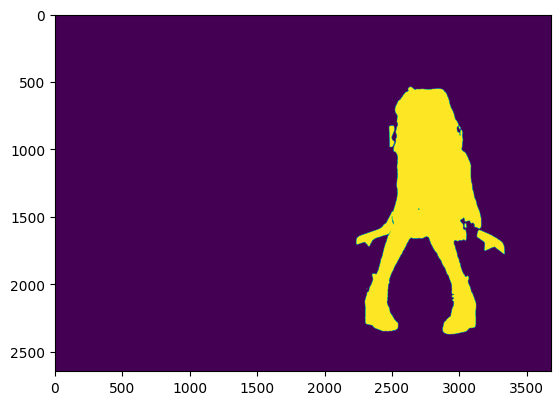

In [69]:
plt.imshow(voted_mask)

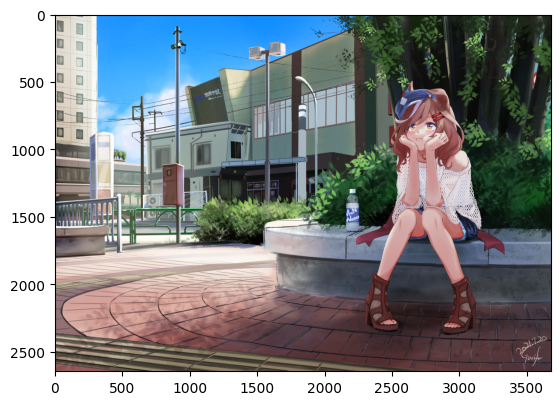

In [71]:
#把yolo_masks[0]、 voted_mask和原图横向拼接起来
yolo_mask_out = cv2.resize(yolo_masks[0],voted_mask.shape[::-1])
yolo_mask_out = np.stack([yolo_mask_out,yolo_mask_out,yolo_mask_out],axis=-1)*255
voted_mask_out = voted_mask
voted_mask_out = np.stack([voted_mask_out,voted_mask_out,voted_mask_out],axis=-1)*255
#读进原图
image = cv2.imread("./samples/sample.png")
image = image[:,:,::-1]
plt.imshow(image)


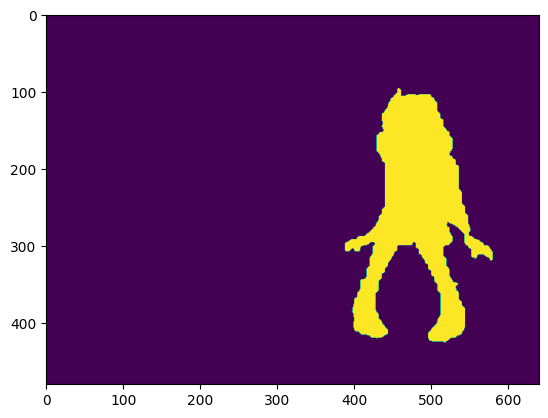

In [72]:
total_yolo_masks = np.sum(np.array(yolo_masks),axis=0)
plt.imshow(total_yolo_masks)

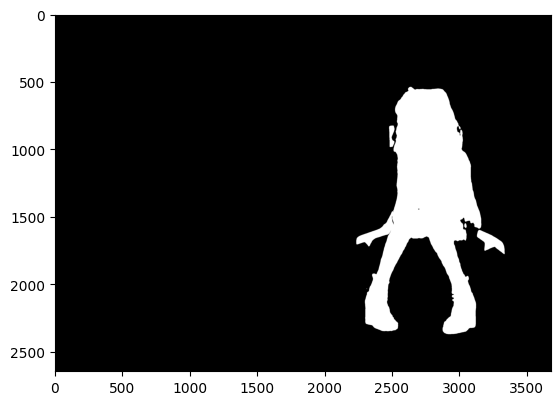

In [73]:
plt.imshow(voted_mask_out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


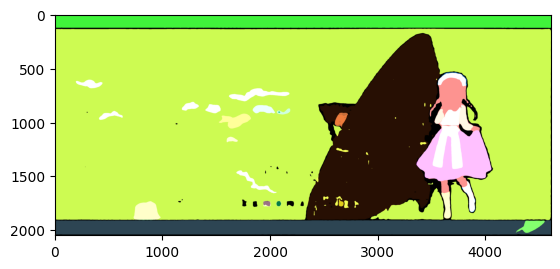

In [17]:
def print_masks(masks):
    #随机选择len(masks)个颜色，
    colors = np.random.randint(0,255,(len(masks),3))
    mask_pic = []
    for i in range(masks.shape[0]):
        temp = masks[i,:,:]
        temp = np.stack([temp,temp,temp],axis=-1)
        temp = np.where(temp == 1, colors[i], temp)
        mask_pic.append(temp)
    #把它们都叠加起来，然后显示
    mask_pic = np.array(mask_pic)
    mask_pic = np.sum(mask_pic,axis=0)
    plt.imshow(mask_pic)
print_masks(sam_masks)

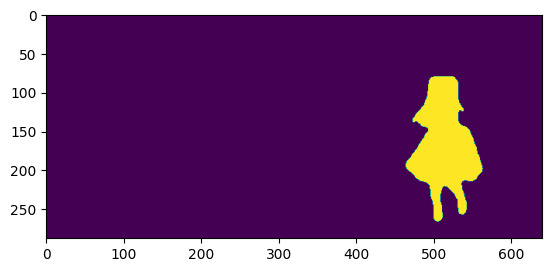

In [18]:
plt.imshow(yolo_masks[0])